<a href="https://colab.research.google.com/github/akhilspillai003/Pytorch/blob/main/Simple_Newralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a model class the inherits nn.module
class Model(nn.Module):
    #input layer (4 Features of Flower)
    #Hidden layer 1
    #hidden layer 2
    #output (3 classof iris flowers)
    def __init__(self, in_features  =4, h1=8,  h2=9, out_features=3):
      super().__init__() #instantiate our nn.Module
      self.fc1 = nn.Linear(in_features, h1)
      self.fc2 = nn.Linear(h1, h2)
      self.out = nn.Linear(h2, out_features)

    def forward(self, x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.out(x)
      return x

In [3]:
#pick a random dseed for randamisation
torch.manual_seed(32)
#create an instance for our model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
#change the last column from a string to an integer
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
#train Test Split! set X, y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [9]:
#Convert these to numpy arrays
X = X.values
y = y.values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)


In [12]:
#convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [13]:
#convert y labels to float tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
#set the criterion of modelto measure the error, how ffar off are the prediction from the data
criterion = nn.CrossEntropyLoss()
#choose Adam optimizer, lr =  learninng rate, if error doesn't gp  dpwn after a bunch of iteration (epochs)..., then lower the learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
#train our model
#Epochs? (one run through all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  #go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  #Measure the loss or error, gonna be hign intially
  loss = criterion(y_pred, y_train) #predicted values vs y_train

  #keep track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i%10 == 0:
    print(f'epoch {i} and loss {loss}')

  # do dome back propogation, take the error rate of forward propogation and feed it
  #back thru network to fine tune the weight
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch 0 and loss 1.1699321269989014
epoch 10 and loss 0.9570867419242859
epoch 20 and loss 0.7980871796607971
epoch 30 and loss 0.6327950358390808
epoch 40 and loss 0.43861737847328186
epoch 50 and loss 0.290453165769577
epoch 60 and loss 0.17780695855617523
epoch 70 and loss 0.11584118008613586
epoch 80 and loss 0.0893637090921402
epoch 90 and loss 0.07752915471792221


Text(0.5, 0, 'Epochs')

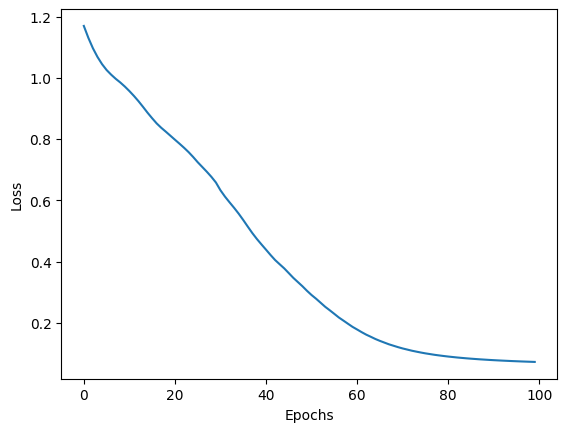

In [16]:
#graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [17]:
#Evaluate dta on ytext data set (Validate model on test set)
with torch.no_grad():              # Basically turn off back propogation
  y_val = model.forward(X_test)    # X_test are test set from our data set and y_pred will be predictions
  loss = criterion(y_val, y_test)    # finf the loss/error

In [18]:
loss

tensor(0.0538)

In [19]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    #Will tell us what type of flower class our networks think it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {torch.argmax(y_val).item()}')

    #correct or not
    if torch.argmax(y_val).item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct')

1.) tensor([-3.3646,  3.9392,  0.3720]) 	 1 	 1
2.) tensor([  7.5572,   1.1015, -11.3347]) 	 0 	 0
3.) tensor([  6.5957,   1.5027, -10.4091]) 	 0 	 0
4.) tensor([-3.3331,  4.2594,  0.0623]) 	 1 	 1
5.) tensor([-7.3782,  2.8087,  5.1605]) 	 2 	 2
6.) tensor([-7.3760,  3.9013,  4.2826]) 	 2 	 2
7.) tensor([  6.1971,   1.6470, -10.0047]) 	 0 	 0
8.) tensor([  6.6383,   1.4348, -10.4031]) 	 0 	 0
9.) tensor([-2.6753,  4.3091, -0.6392]) 	 1 	 1
10.) tensor([  7.1875,   1.3812, -11.0965]) 	 0 	 0
11.) tensor([-3.8318,  4.4027,  0.5246]) 	 1 	 1
12.) tensor([-8.6807,  1.9994,  6.8923]) 	 2 	 2
13.) tensor([-2.0678,  3.8200, -0.7571]) 	 1 	 1
14.) tensor([-1.0768,  4.3741, -2.2838]) 	 1 	 1
15.) tensor([-7.4965,  2.6207,  5.3287]) 	 2 	 2
16.) tensor([-8.6136,  1.5508,  7.1186]) 	 2 	 2
17.) tensor([-3.7761,  3.6462,  0.9487]) 	 1 	 1
18.) tensor([-6.7608,  2.7754,  4.5281]) 	 2 	 2
19.) tensor([-1.7048,  4.1980, -1.4670]) 	 1 	 1
20.) tensor([  7.7757,   1.3740, -11.8864]) 	 0 	 0
21.) tensor

In [20]:
#for adding a new Feature values
new_iris = torch.tensor([5.9,	3.0,	5.1,	1.8])


In [21]:
with torch.no_grad():
  y_valu = model.forward(new_iris)
  print(torch.argmax(y_valu).item())

2


In [22]:
#Save our NN model
torch.save(model.state_dict(), 'iris.pt')

In [23]:
#Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris.pt'))

<All keys matched successfully>

In [24]:
#Make sure it is loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)